In [295]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from mne.viz import plot_topomap
import mne

# Load the sample EEG data
eeg_data = loadmat('sampleEEGdata.mat')
eeg = eeg_data['EEG']
eeg_times = eeg['times'][0][0].T

# Compute the ERP of each channel
# (remember that the ERP is the time-domain average across all trials at each time point)
erp = np.mean(eeg['data'][0][0], axis=2)

In [289]:
eeg['times'][0][0].T.shape

(640, 1)

(-400.0, 1200.0)

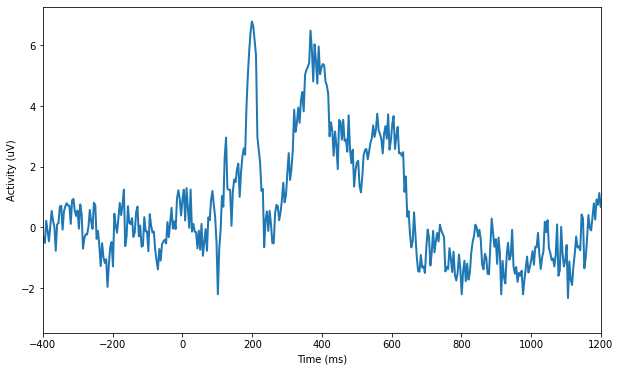

In [290]:
chan2plot = 'fcz'
chanlocs = []
for i in eeg['chanlocs'][0][0]['labels'][0]:
    chanlocs.append(i[0].lower())
chanlocs = np.array(chanlocs)

chan_idx = np.where(chanlocs == chan2plot)[0][0]

plt.figure(figsize=(10,6))
plt.plot(eeg_times, erp[chan_idx], linewidth=2)
plt.xlabel('Time (ms)'), plt.ylabel('Activity (uV)')
plt.xlim([-400, 1200])

In [348]:
def pol2cart(theta, rho):
    theta_rad = np.deg2rad(theta)
    x = rho * np.cos(theta_rad)
    y = rho * np.sin(theta_rad)
    return x, y

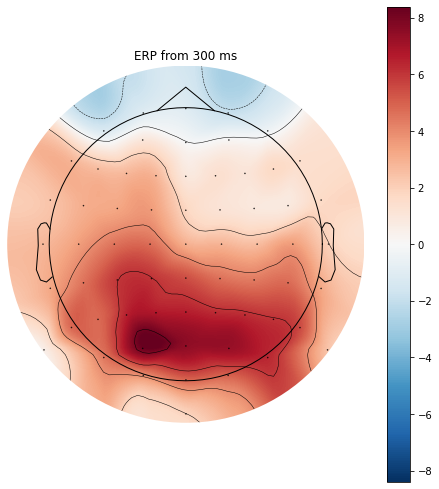

In [373]:
head_rad = 0.095
plot_rad = 0.51
squeezefac = head_rad/plot_rad

eeg_chanlocs = []
for i in range(64):
    local_chanloc = []
    x = list(eeg['chanlocs'][0][0][0][i])
    th = x[1][0][0]
    rd = x[2][0][0]
    
    th, rd = pol2cart(th,rd)
    eeg_chanlocs.append([rd * squeezefac,th*squeezefac])

eeg_chanlocs = np.array(eeg_chanlocs)

# Plot topographical maps
time2plot = 300 # in ms
# convert time in ms to time in indices
tidx = np.argmin(np.abs(eeg_times - time2plot))

fig, ax = plt.subplots(figsize=(8,8))
im, _ = plot_topomap(erp[:, tidx], eeg_chanlocs, axes=ax, show=False, 
                     cmap='RdBu_r', ch_type='eeg', size = 200,
                    contours=6)
plt.colorbar(im)

# Add a title
plt.title('ERP from {} ms'.format(time2plot))
plt.show()

In [329]:


def normalize_arr(arr):
    # calculate the maximum absolute value in the array
    max_val = np.max(np.abs(arr))

    # normalize the array
    normalized_arr = arr / max_val

    # multiply the array by 2 and subtract 1 to make each element between -1 and 1
    normalized_arr = normalized_arr * 2 - 1
    
    return normalized_arr


print(normalize_arr(eeg_chanlocs))

[[ 0.56118623 -1.00852505]
 [ 0.58337985 -1.0173123 ]
 [ 0.2766359  -1.00873489]
 [-0.15413774 -1.00605341]
 [ 0.04457456 -1.01271159]
 [ 0.30824773 -1.01969012]
 [ 0.60068996 -1.02629024]
 [ 0.61213948 -1.0353383 ]
 [ 0.23729976 -1.02613533]
 [-0.12640072 -1.01661414]
 [-0.45078688 -1.00751642]
 [-0.59638426 -1.01106813]
 [-0.19182573 -1.02216211]
 [ 0.21185735 -1.03323208]
 [ 0.6157593  -1.04430806]
 [ 0.61165335 -1.05306596]
 [ 0.23687259 -1.04171251]
 [-0.1268031  -1.03128727]
 [-0.45120033 -1.02259377]
 [-0.1550772  -1.04031204]
 [ 0.04370137 -1.04455403]
 [ 0.30736072 -1.05203624]
 [ 0.59972516 -1.06147295]
 [ 1.         -1.07722047]
 [ 0.58194904 -1.06948873]
 [ 0.27519601 -1.06124256]
 [ 0.55930721 -1.07704649]
 [ 0.91759451 -0.89475062]
 [ 0.53373928 -0.91581895]
 [ 0.15008584 -0.93687622]
 [-0.23302946 -0.95790394]
 [-0.61671653 -0.97896305]
 [ 0.53604773 -1.        ]
 [ 0.56118623 -0.99147495]
 [ 0.58331266 -0.98270483]
 [ 0.2766359  -0.99126511]
 [ 0.15181685 -1.        ]
 

In [315]:
layout.pos[:, [1,2]]

array([[0.58393009, 0.06682268],
       [0.692726  , 0.06682268],
       [0.58568754, 0.06682268],
       [0.54910953, 0.06682268],
       [0.63014642, 0.06682268],
       [0.70856058, 0.06682268],
       [0.78150219, 0.06682268],
       [0.83967062, 0.06682268],
       [0.74850836, 0.06682268],
       [0.65535402, 0.06682268],
       [0.56142228, 0.06682268],
       [0.56528222, 0.06682268],
       [0.66360832, 0.06682268],
       [0.76172165, 0.06682268],
       [0.85988817, 0.06682268],
       [0.83967062, 0.06682268],
       [0.74850836, 0.06682268],
       [0.65535402, 0.06682268],
       [0.56142228, 0.06682268],
       [0.54910953, 0.06682268],
       [0.63014642, 0.06682268],
       [0.70856058, 0.06682268],
       [0.78150219, 0.06682268],
       [0.85713082, 0.06682268],
       [0.692726  , 0.06682268],
       [0.58568754, 0.06682268],
       [0.58393009, 0.06682268],
       [0.46718525, 0.06682268],
       [0.46718525, 0.06682268],
       [0.46718525, 0.06682268],
       [0.